In [1]:
import os
import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def get_content(pattern, path="."):
    files = os.listdir(path)
    matches = [x for x in files if pattern in x]
    print(f"Found {len(matches)} matches: {matches}")
    name = matches[0]
    if name.endswith("npy"):
        return np.load(path+"/"+name)
    elif name.endswith("pickle"):
        with open(path+"/"+name, "rb") as f:
            return pickle.load(f)

def plot_lists(lists, legend=[], 
                legend_title="",
                figsize=(14,6), 
                subplots=(1,1),
                ax=None,
                ):
    if not ax:
        _, ax = plt.subplots(*subplots, figsize=figsize)
    [ax.plot(x) for x in lists]
    ax.legend(legend, title=legend_title)
    return ax


In [3]:
train_loss = {}
val_loss = {}
train_metrics = {}
val_metrics = {}
duration = {}

for i in [50, 100, 150, 200, 250, 300]:
    prefix = f"{i}"
    fileprefix = f"pl{prefix}_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128"
    path = "../ffnn/" if prefix == "150" else "."

    val_loss[prefix] = get_content(f"{fileprefix}-val_losses", path=path)
    train_loss[prefix] = get_content(f"{fileprefix}-train_losses", path=path)
    val_metrics[prefix] = get_content(f"{fileprefix}-val_metrics", path=path)
    train_metrics[prefix] = get_content(f"{fileprefix}-train_metrics", path=path)
    duration[prefix] = get_content(f"{fileprefix}-duration", path=path)

Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128-val_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128-train_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128-val_metrics.npy']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128-train_metrics.npy']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl50_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128-duration.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl100_model-conv128-bn_cFalse_fTrue-ffnn1024_512_256_128-val_losses.pickle']
Found 1 matches: ['ep50-optim_adam-lr0.001-l2reg0-dr0.5_arr-ed32-kb150-pl100_model-conv128-bn_cFalse_fTrue-ffnn1024_512

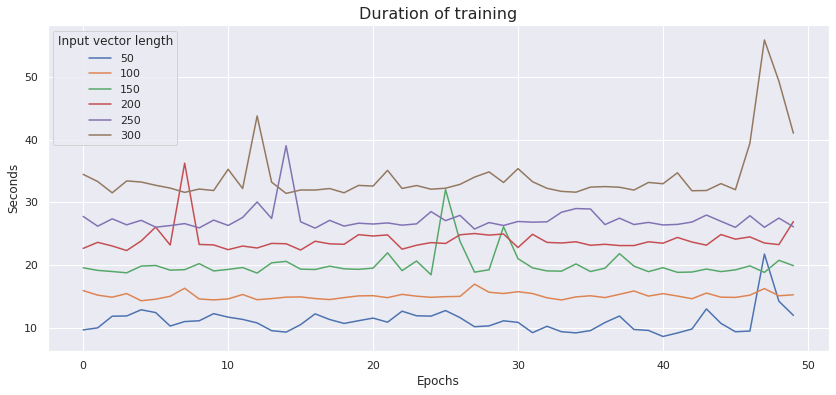

In [4]:
legend_title = "Input vector length"

ax = plot_lists([duration[x] for x in duration.keys()], 
                legend_title=legend_title,
                legend=list(duration.keys()))
ax.set_title("Duration of training", fontsize=16)
ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Seconds")

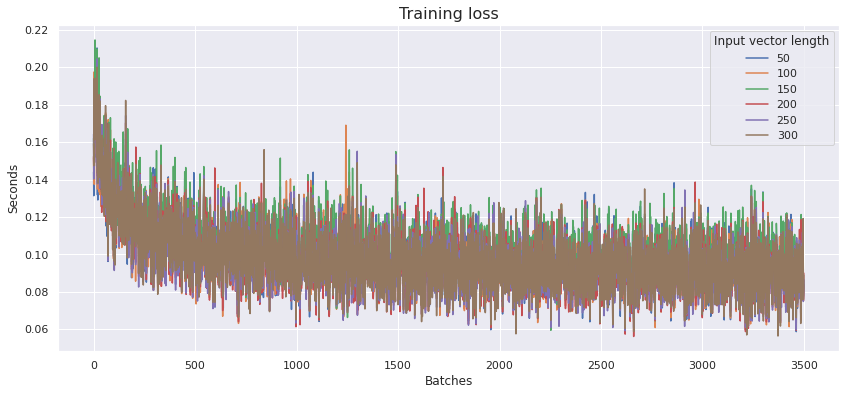

In [5]:
ax = plot_lists([train_loss[x][50:] for x in train_loss.keys()], 
                legend_title=legend_title,
                legend=list(train_loss.keys()))
ax.set_title("Training loss", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

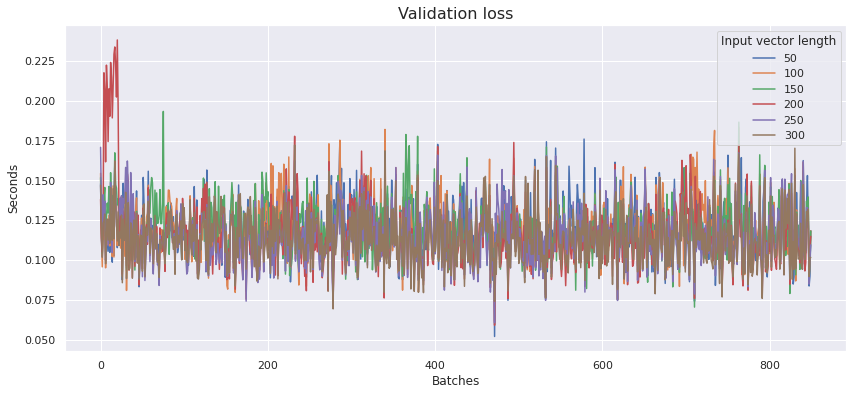

In [6]:
ax = plot_lists([val_loss[x][50:] for x in val_loss.keys()], 
                legend_title=legend_title,
                legend=list(val_loss.keys()))
ax.set_title("Validation loss", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

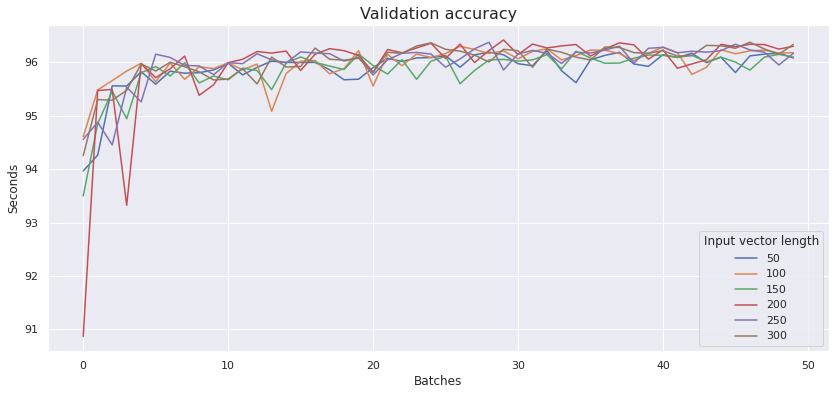

In [7]:
ax = plot_lists([val_metrics[x][:,0] for x in val_metrics.keys()], 
                legend_title=legend_title,
                legend=list(val_metrics.keys()))
ax.set_title("Validation accuracy", fontsize=16)
ax.set_xlabel("Batches")
_ = ax.set_ylabel("Seconds")

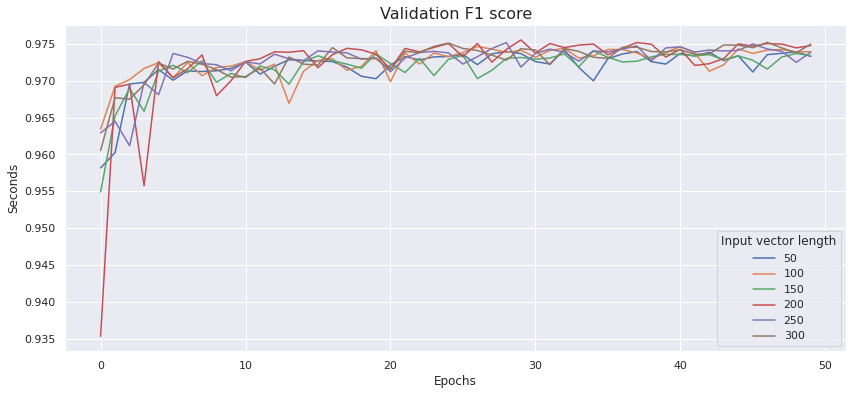

In [8]:
ax = plot_lists([val_metrics[x][:,1] for x in val_metrics.keys()], 
                legend_title=legend_title,
                legend=list(val_metrics.keys()))
ax.set_title("Validation F1 score", fontsize=16)
ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Seconds")

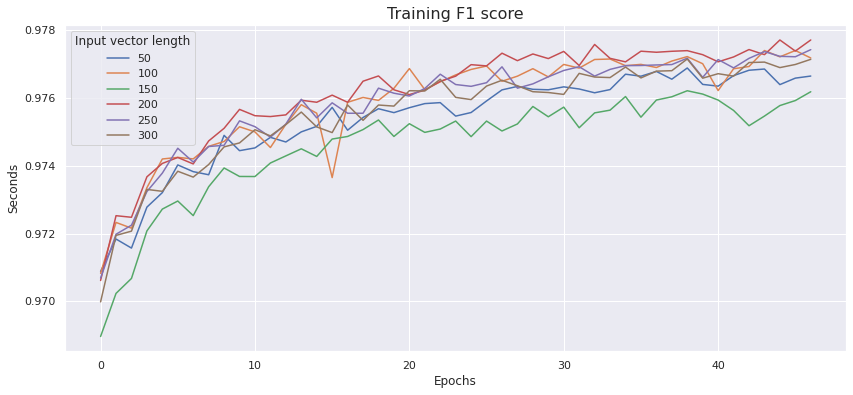

In [9]:
ax = plot_lists([train_metrics[x][3:,1] for x in train_metrics.keys()], 
                legend_title=legend_title,
                legend=list(train_metrics.keys()))
ax.set_title("Training F1 score", fontsize=16)
ax.set_xlabel("Epochs")
_ = ax.set_ylabel("Seconds")

In [10]:
import pandas as pd
df = pd.DataFrame([val_metrics[x][:,1] for x in val_metrics.keys()],
                index=val_metrics.keys())
df[list(range(40,49))].mean(axis=1).sort_values(ascending=False)

300    0.974346
250    0.974071
200    0.973989
100    0.973582
50     0.973274
150    0.973115
dtype: float64

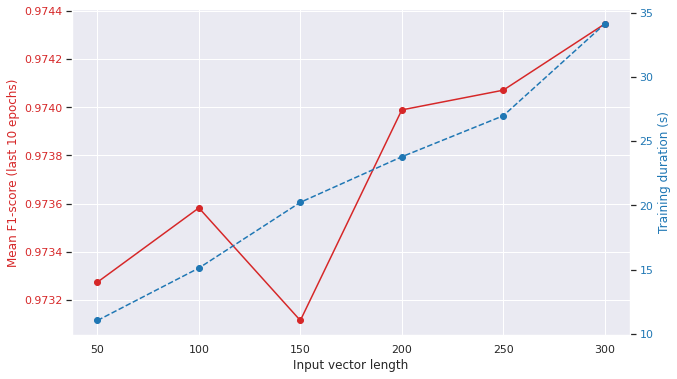

In [12]:
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel("Input vector length", fontsize=12)

# 1st plot
df = pd.DataFrame([val_metrics[x][:,1] for x in val_metrics.keys()],
                    index=val_metrics.keys())
mean_f1_last10epochs = df[list(range(40,49))].mean(axis=1)

color = "tab:red" # "tab:orange"
ax1.plot(mean_f1_last10epochs, color=color)
ax1.scatter(x=mean_f1_last10epochs.index, y=mean_f1_last10epochs.values, color=color)
ax1.set_ylabel("Mean F1-score (last 10 epochs)", color=color, fontsize=12)
ax1.tick_params(axis="y", labelcolor=color)

# 2nd plot
ax2 = ax1.twinx()
color = "tab:blue"
duration_mean = pd.DataFrame(duration).transpose()[list(range(15,49))].mean(axis=1)
ax2.plot(duration_mean, "--", color=color)
ax2.scatter(x=duration_mean.index, y=duration_mean.values, color=color)
ax2.set_ylabel("Training duration (s)", color=color, fontsize=12)
ax2.tick_params(axis="y", labelcolor=color)

ax2.grid(False)